In [1]:
pip install librosa --upgrade#install librosa

Note: you may need to restart the kernel to use updated packages.


In [2]:
import librosa 
import librosa.display
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
ipd.Audio('file_example_WAV_2MG.wav')

In [4]:
music , sr = librosa.load('file_example_WAV_2MG.wav')

In [5]:
print("Shape of the audio file: ",music.shape)
print("Sample Rate of the audio file: ",sr)

Shape of the audio file:  (739329,)
Sample Rate of the audio file:  22050


In [6]:
sample_duration = 1 / sr
print(f"Duration of one sample is {sample_duration:6f} seconds")

Duration of one sample is 0.000045 seconds


In [7]:
# total number of samples in audio file
tot_samples = len(music)
print(tot_samples)

739329


In [8]:
duration = 1 / sr * tot_samples
print(f"Duration of whole audio is {duration} seconds")

Duration of whole audio is 33.52965986394558 seconds


Text(0.5, 1.0, 'Sample music')

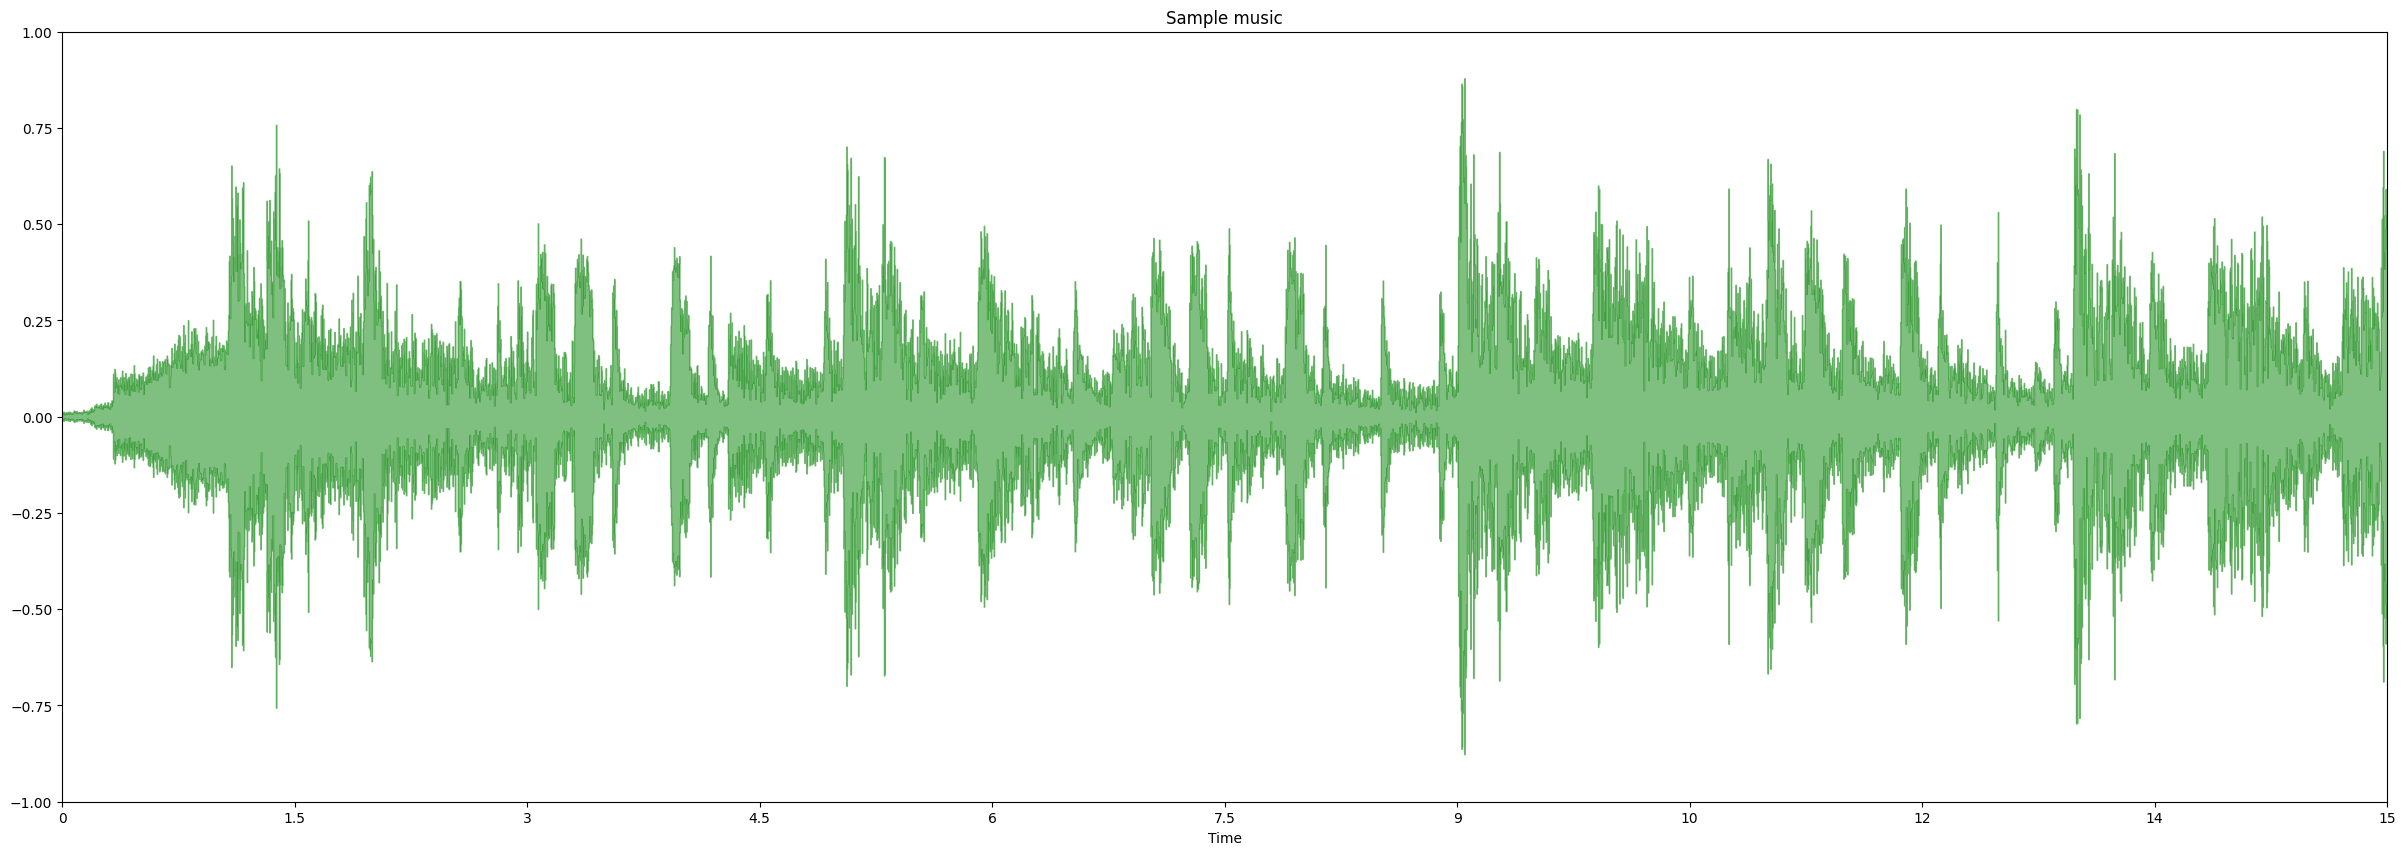

In [9]:
plt.figure(figsize=(30, 10))

librosa.display.waveshow(music, alpha=0.5, color = 'green')
plt.ylim((-1, 1))
plt.xlim((0,15))
plt.title("Sample music")

Amplitude Envelope: Represents the overall amplitude variations over time, highlighting the dynamic range of the signal.

In [10]:
FRAME_SIZE = 1024
HOP_LENGTH = 512  ### used for overlapping frames

def amplitude_envelope(signal, frame_size, hop_length):
    amplitude_envelope = []
    
    # calculate amplitude envelope for each frame
    for i in range(0, len(signal), hop_length): 
        amplitude_envelope_current_frame = max(signal[i:i+frame_size]) 
        amplitude_envelope.append(amplitude_envelope_current_frame)
    
    return np.array(amplitude_envelope)
    print(amplitude_envelope)

In [11]:
AE_music = amplitude_envelope(music, FRAME_SIZE, HOP_LENGTH)

In [12]:
print(len(AE_music))

1445


Text(0.5, 1.0, 'Sample music')

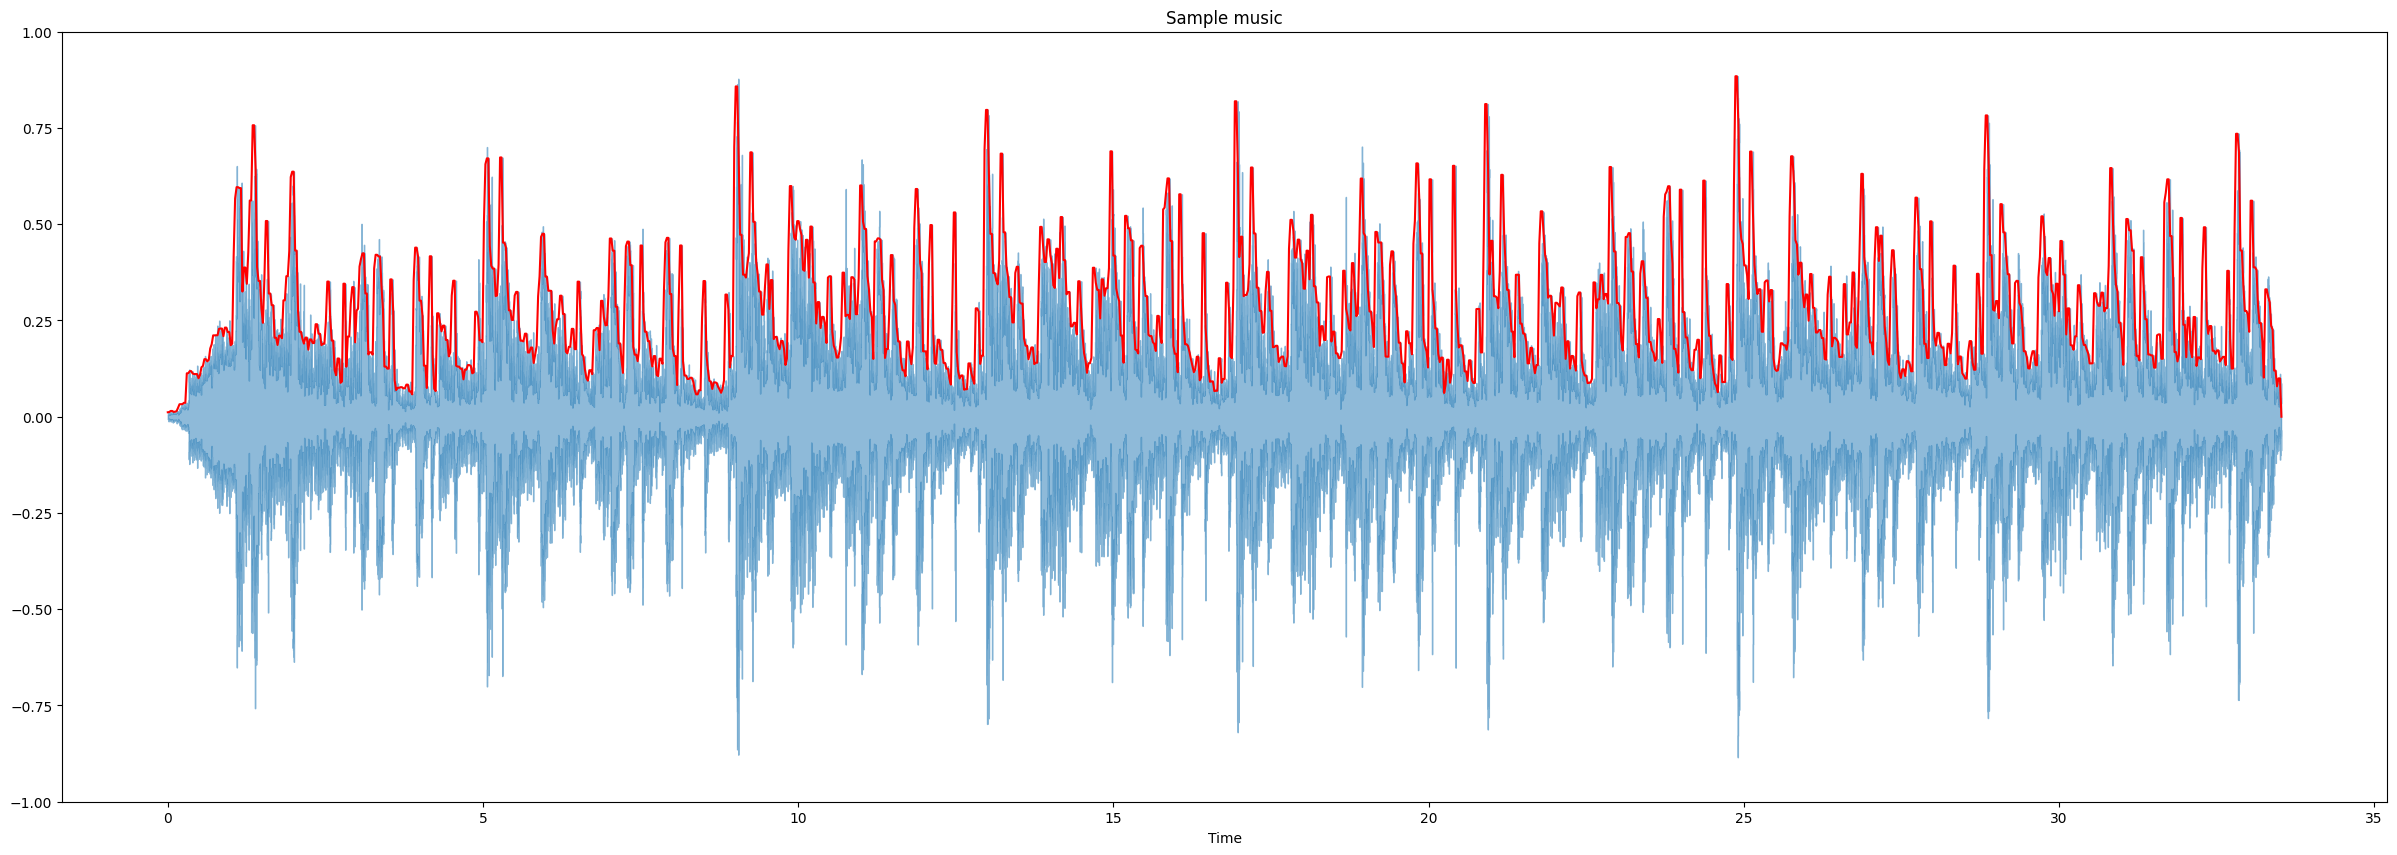

In [13]:
frames = range(len(AE_music))
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

plt.figure(figsize=(30, 10))

librosa.display.waveshow(music, alpha=0.5)
plt.plot(t, AE_music, color="r")
plt.ylim((-1, 1))
plt.title("Sample music")

In [14]:
fft_music = np.fft.fft(music)
len(fft_music)

739329

In [15]:
def plot_magnitude_spectrum(signal, sr, title, f_ratio=1):
    fft_music = np.fft.fft(signal)
    fft_abs = np.absolute(fft_music)
    
    plt.figure(figsize=(18, 5))
    
    f = np.linspace(0, sr, len(fft_abs))
    f_bins = int(len(fft_abs)*f_ratio)  
    
    plt.plot(f[:f_bins], fft_abs[:f_bins])
    plt.xlabel('Frequency (Hz)')
    plt.title(title)

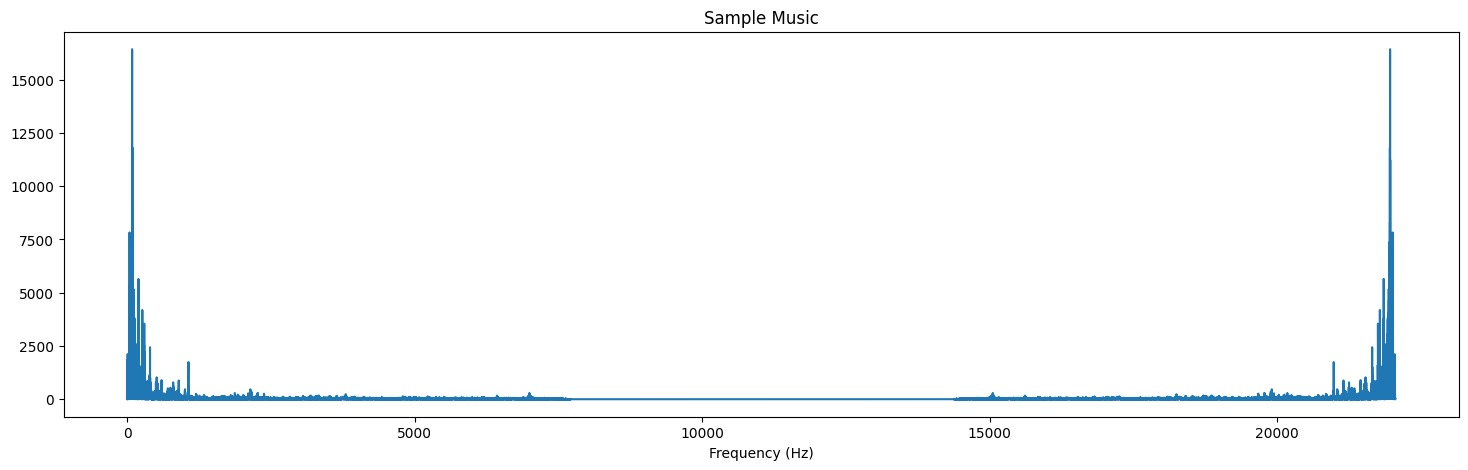

In [16]:
plot_magnitude_spectrum(music, sr, "Sample Music", 1)

In [17]:
### extracting short time fourier transform

FRAME_SIZE = 2048
HOP_SIZE = 512

ssft = librosa.stft(music, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)

In [18]:
type(ssft[0][0])

numpy.complex64

In [19]:
ssft_abs = np.abs(ssft) ** 2
type(ssft_abs[0][0])

numpy.float32

In [20]:
def plot_spectrogram(Y, sr, hop_length, y_axis="linear"):
    plt.figure(figsize=(25, 10))
    librosa.display.specshow(Y, 
                             sr=sr, 
                             hop_length=hop_length, 
                             x_axis="time", 
                             y_axis=y_axis)
    plt.colorbar(format="%+2.f")

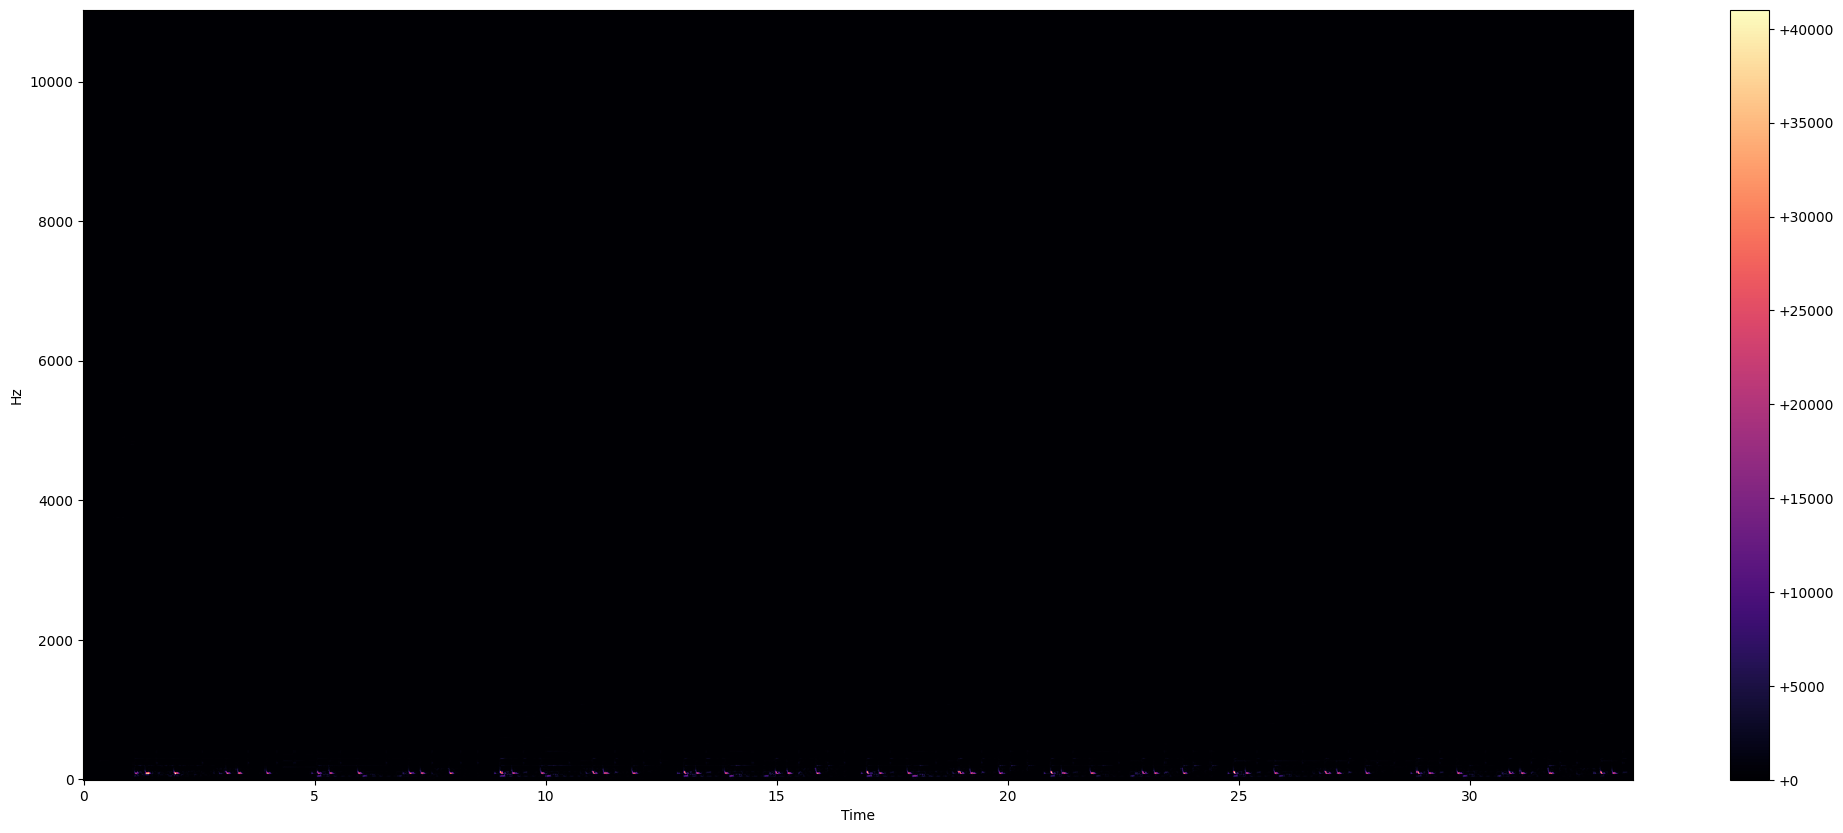

In [21]:
plot_spectrogram(ssft_abs, sr, HOP_SIZE)

## low frequency that's why it's black

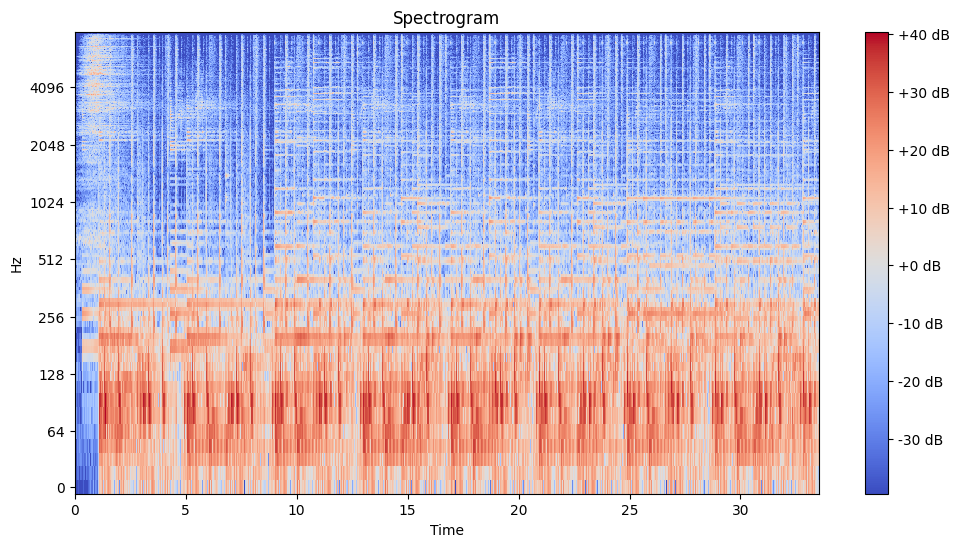

In [22]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Load an example audio file
audio_file_path = 'file_example_WAV_2MG.wav'  # Replace with your audio file path
music, sr = librosa.load(audio_file_path, sr=None)

# Parameters
FRAME_SIZE = 1024
HOP_SIZE = 512

# Compute the STFT
sfft = librosa.stft(music, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)

# Compute the magnitude squared (power)
sfft_abs = np.abs(sfft) ** 2

# Convert to dB
sfft_abs_log = librosa.power_to_db(sfft_abs)

# Plotting function
def plot_spectrogram(spectrogram, sr, hop_length, y_axis='log'):
    plt.figure(figsize=(12, 6))
    librosa.display.specshow(spectrogram, sr=sr, hop_length=hop_length, x_axis='time', y_axis=y_axis)
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram')
    plt.show()

# Plot the spectrogram
plot_spectrogram(sfft_abs_log, sr, HOP_SIZE, y_axis='log')

MFCCS has three orders, first order which is mel frequency static(shape of the music), delta, delta delta. 

In [23]:
mfccs = librosa.feature.mfcc(y=music, n_mfcc=13, sr=sr)

In [24]:
delta_mfccs = librosa.feature.delta(mfccs)

In [25]:
delta2_mfccs = librosa.feature.delta(mfccs, order=2)

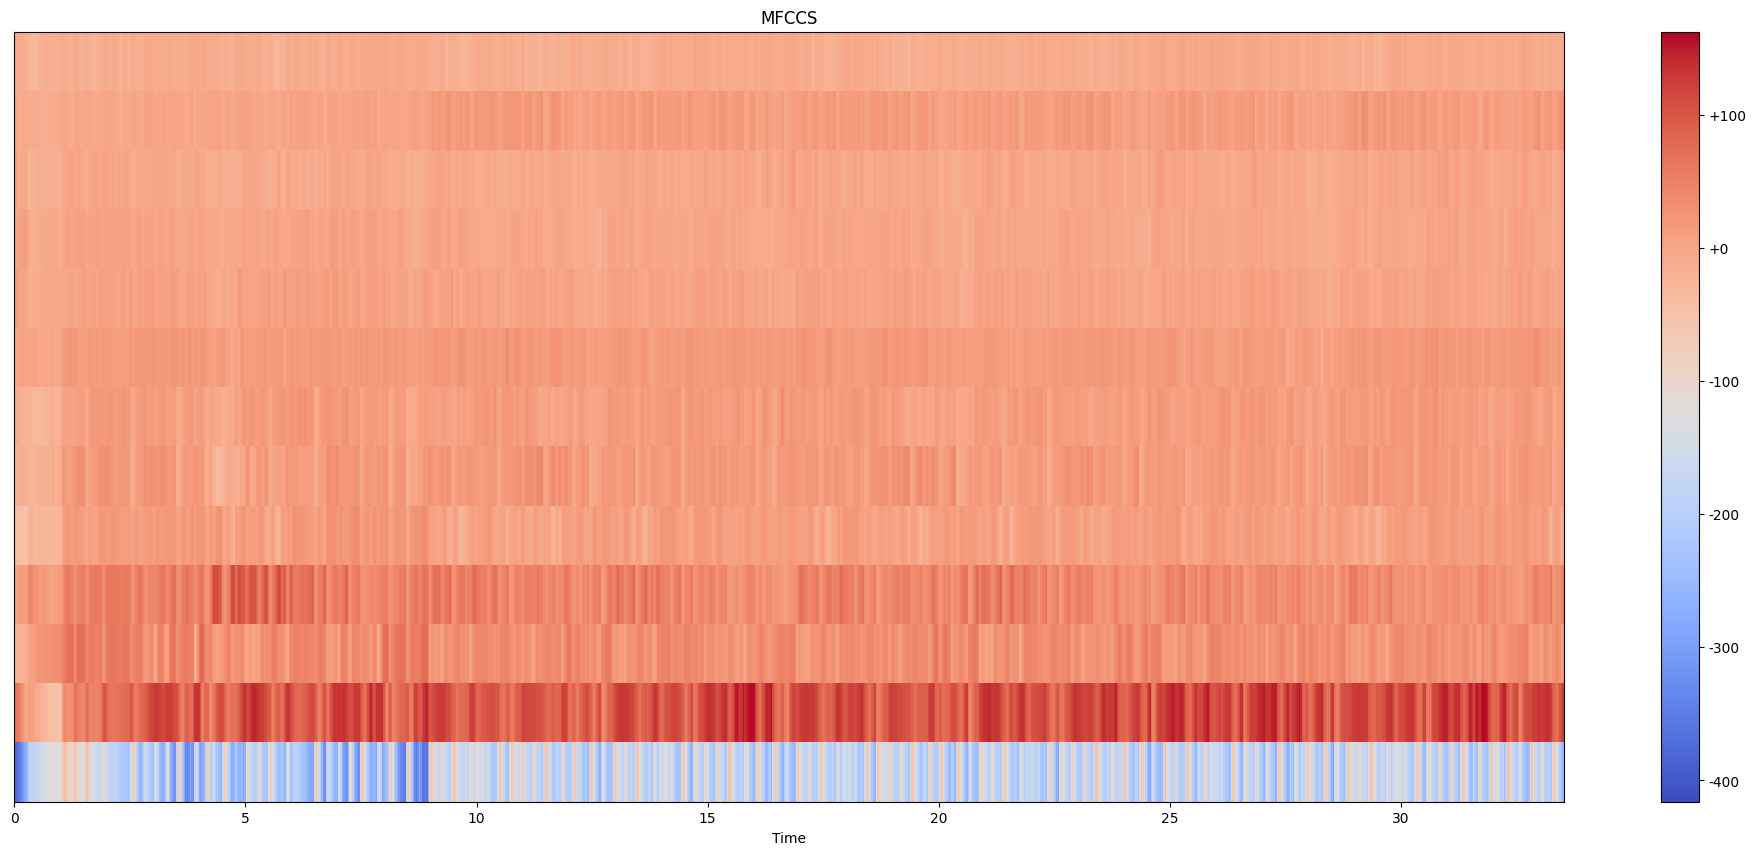

In [26]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(mfccs, 
                         x_axis="time", 
                         sr=sr)
plt.colorbar(format="%+2.f")
plt.title('MFCCS')
plt.show()


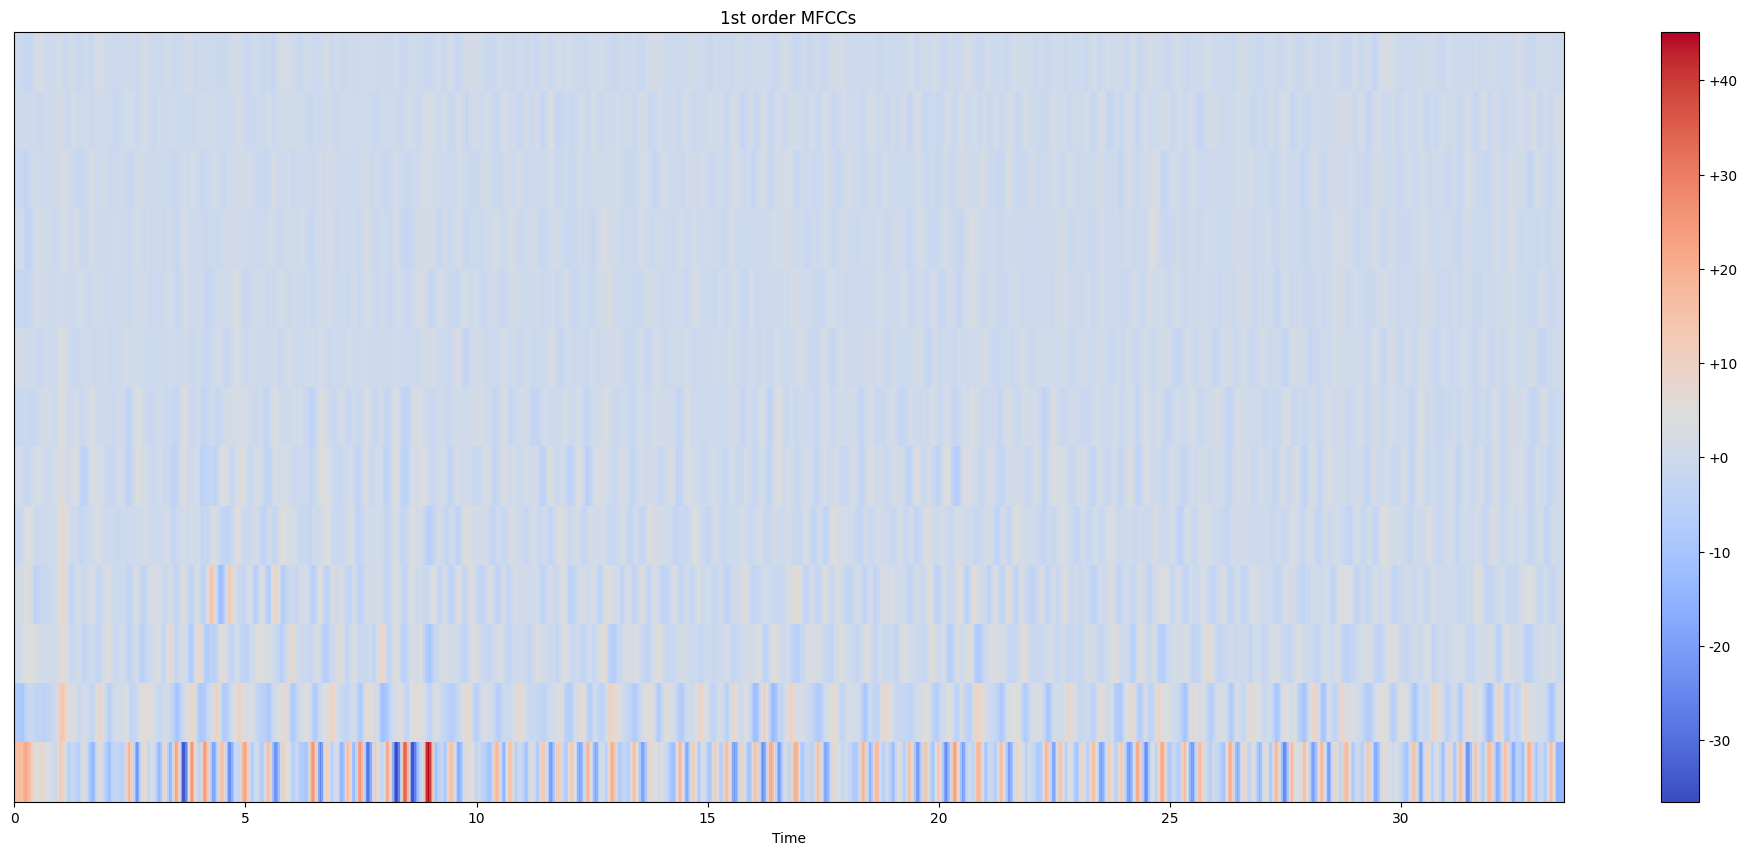

In [28]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(delta_mfccs, 
                         x_axis="time", 
                         sr=sr)
plt.colorbar(format="%+2.f")
plt.title('1st order MFCCs')
plt.show()

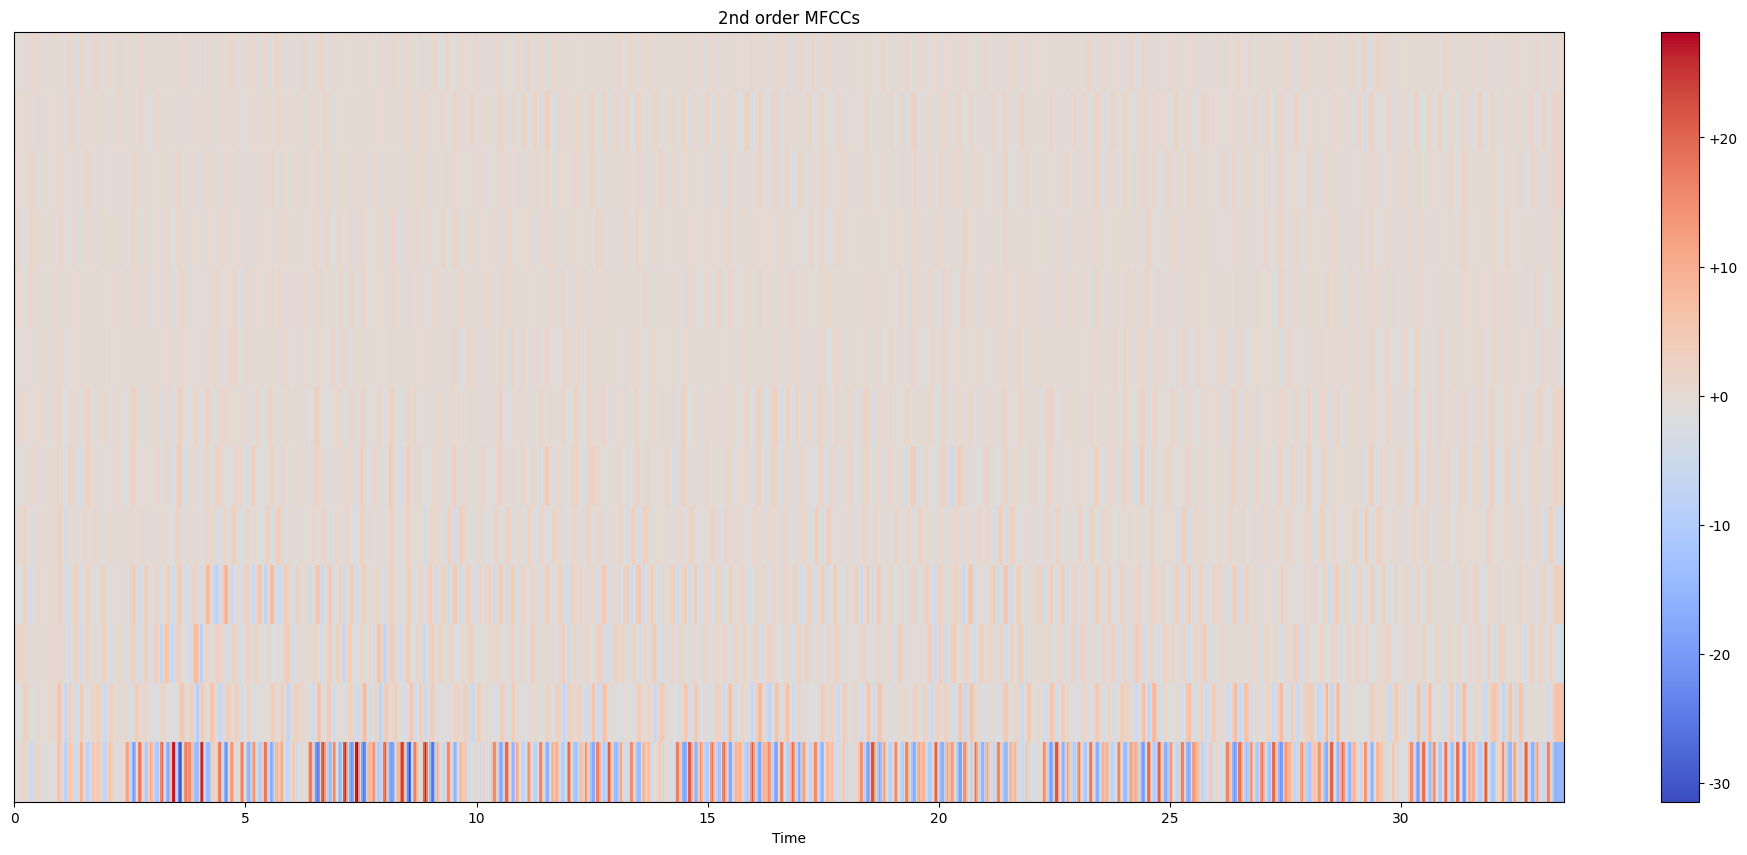

In [27]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(delta2_mfccs, 
                         x_axis="time", 
                         sr=sr)
plt.colorbar(format="%+2.f")
plt.title('2nd order MFCCs')
plt.show()